In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version:{pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version:{sns.__version__}')

pandas version:1.4.2
numpy version: 1.21.5
seaborn version:0.11.2


กรณี run ไม่ผ่านใน url='' ให้เพิ่ม ?raw=true ไว้ท้าย link ที่เก็บไฟล์ csv
When youreference a file on GitHub, you need to make sure you are accessing the "raw" version,
not the version from the GitHub interface. Adding the ?raw=true parameter to your url should work:

In [4]:
url='https://github.com/TheEconomist/big-mac-data/blob/master/output-data/big-mac-adjusted-index.csv?raw=true'
df=pd.read_csv(url, parse_dates=['date']) ## parse_date เพื่อไม่ให้ค่าเป็น string
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20932.924968,2.155755,0.48988,NaN,0.00000,0.17908,1.11143
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1386 non-null   datetime64[ns]
 1   iso_a3         1386 non-null   object        
 2   currency_code  1386 non-null   object        
 3   name           1386 non-null   object        
 4   local_price    1386 non-null   float64       
 5   dollar_ex      1386 non-null   float64       
 6   dollar_price   1386 non-null   float64       
 7   GDP_bigmac     1386 non-null   float64       
 8   adj_price      1386 non-null   float64       
 9   USD            1386 non-null   float64       
 10  EUR            1359 non-null   float64       
 11  GBP            1386 non-null   float64       
 12  JPY            1386 non-null   float64       
 13  CNY            1386 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 151.7+ KB


กำหนดค่าที่ต้องการดู วัน เดือน 1 ปี 2019

In [6]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.399753,-0.43098,-0.50205,-0.39927,-0.29817,-0.37617
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58098.493185,4.422256,-0.04923,-0.16798,0.00375,0.17267,0.04235
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.536049,3.085813,0.42311,0.24536,0.50241,0.75525,0.56019
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,48323.923768,4.154216,-0.05279,-0.17109,0.00000,0.16829,0.03846
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.981740,0.23376,0.07967,0.30252,0.52171,0.35260


fun seaborn สร้างตัวแปรมารับค่า ที่ต้องการให้แสดงเพื่อสร้างกราฟ

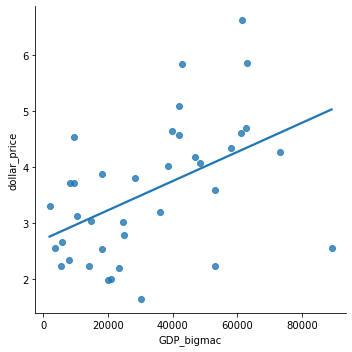

In [12]:
sns.lmplot(x='GDP_bigmac', y='dollar_price', data=df, ci=None)

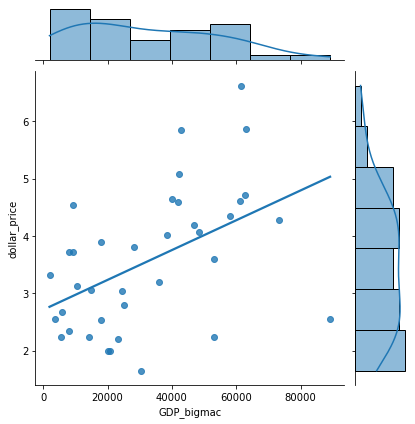

In [10]:
sns.jointplot(x='GDP_bigmac', y='dollar_price',data=df,kind='reg',ci=None)

##sklearn: LinearRegression

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.0.2


สร้าง obj {model} เพื่อผ่านค่าพารามิเตอร์

In [15]:
model = LinearRegression()
model

LinearRegression()

ผ่านค่าเข้าไปแบบ array 2 มิติ

In [16]:
df['GDP_bigmac'] ##การส่งข้อมูลแบบอนุกรม (serial transmission)

1021    20810.978188
1022    58098.493185
1023     9362.536049
1024    48323.923768
1025    42034.227332
1026    18014.007593
1027    14684.528808
1028     8101.496446
1029    28252.359106
1030    61193.362480
1031     5381.090102
1032    39944.916991
1033    89178.723636
1034    24590.421905
1035     3697.193379
1036     8017.422572
1037    41860.346370
1038    53111.178465
1039    23268.115608
1040    18042.461852
1041    46896.028892
1042    62881.591456
1043     1913.084987
1044    10332.342251
1045     5810.261080
1046    25059.293931
1047    30251.237299
1048    35970.358705
1049    73232.278614
1050    14049.528435
1051    38498.441108
1052    42749.285684
1053    61473.801918
1054    53173.029630
1055     9334.129259
1056    20082.768770
1057    62769.664000
Name: GDP_bigmac, dtype: float64

In [17]:
df[['GDP_bigmac']] ##จะส่งข้อมูลแบบ Data Frame(df)

,GDP_bigmac
1021,20810.978188
1022,58098.493185
1023,9362.536049
1024,48323.923768
1025,42034.227332
1026,18014.007593
1027,14684.528808
1028,8101.496446
1029,28252.359106
1030,61193.362480


In [18]:
model.fit(df[['GDP_bigmac']],df['dollar_price'])

LinearRegression()

In [19]:
X=df[['GDP_bigmac']] # expect 2 D array not series (1D)
y=df.dollar_price

In [20]:
model.fit(X,y) #syntex กำหนดให้ใช้ค่า X ตัวใหญ่

LinearRegression()

In [21]:
model.score(X,y) #เมื่อผ่านค่า X ,y จะได้ค่า R-squard

0.23519741311775022

In [22]:
model.intercept_

2.714978656576098

In [23]:
model.coef_

array([2.59773624e-05])

สมการเส้นตรง y = α + βx

In [24]:
model.intercept_ + model.coef_ * 9000 ##หาประเทศที่ีมี GDP=9000

array([2.94877492])

In [25]:
model.predict([[9000]]) ## ใช้ func sklearn กรณี array 2 มิติแต่ผ่านค่าค่าเดียว 1 row , 1 clolumn ให้ใช้ [[]]

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.94877492])

In [26]:
model.predict([[9000],
               [4000]]) # 1row , 2 clolumn ,2 D

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.94877492, 2.81888811])

In [27]:
np.arange(5000 , 50001, 2500) # array ที่มีค่าตั้งแต่ 5000 - 50000 step ทีละ 2500 array 1 D

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [28]:
np.arange(5000, 50001, 2500) .reshape(-1,1) #เขียนให้อยู่ในรูปแบบ array 2  D ,(n)row ,1 column ด้วยการ predict ต้องทำให้อยู่ในรูป (-1,1)

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [29]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1,1)) ##เขียนในแบบ predict

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.90980887, 2.97475228, 3.03969569, 3.10463909,
       3.1695825 , 3.23452591, 3.29946931, 3.36441272, 3.42935612,
       3.49429953, 3.55924294, 3.62418634, 3.68912975, 3.75407315,
       3.81901656, 3.88395997, 3.94890337, 4.01384678])

In [30]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [31]:
np.linspace(5000, 50000, 20).reshape(-1,1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [32]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1,1))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.9063908 , 2.96791613, 3.02944146, 3.0909668 ,
       3.15249213, 3.21401746, 3.27554279, 3.33706813, 3.39859346,
       3.46011879, 3.52164412, 3.58316945, 3.64469479, 3.70622012,
       3.76774545, 3.82927078, 3.89079611, 3.95232145, 4.01384678])

In [33]:
s=pd.Series(np.linspace(5000, 50000, 20)) ## sklearn
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [34]:
##แปลงค่าจาก sklearn กลับมาเป็น predict
model.predict(s.to_frame())

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.9063908 , 2.96791613, 3.02944146, 3.0909668 ,
       3.15249213, 3.21401746, 3.27554279, 3.33706813, 3.39859346,
       3.46011879, 3.52164412, 3.58316945, 3.64469479, 3.70622012,
       3.76774545, 3.82927078, 3.89079611, 3.95232145, 4.01384678])

Statsmodels: Simple Linear regression

In [41]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import numpy as np
import pandas as pd


In [43]:
#formula: response - predictor + predictor
model_a=smf.ols(formula='dollar_price ~ GDP_bigmac', data=df).fit() # ใช้เครื่องหมาย ~ 

In [44]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     10.76
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00235
Time:                        10:48:51   Log-Likelihood:                -54.004
No. Observations:                  37   AIC:                             112.0
Df Residuals:                      35   BIC:                             115.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7150      0.313      8.669      0.0

In [45]:
model_a.pvalues

Intercept     3.099333e-10
GDP_bigmac    2.348908e-03
dtype: float64

In [46]:
model.intercept_ #sklearn

2.714978656576098

In [47]:
model.coef_

array([2.59773624e-05])